# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold 
print(np.unique(y))
print(X.shape)
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200, early_exaggeration=12.)

[0 1 2 3 4 5 6 7 8 9]
(1797, 64)


In [3]:
np.max(X,0)
# np.min(X,0)

array([ 0.,  8., 16., 16., 16., 16., 16., 15.,  2., 16., 16., 16., 16.,
       16., 16., 12.,  2., 16., 16., 16., 16., 16., 16.,  8.,  1., 15.,
       16., 16., 16., 16., 15.,  1.,  0., 14., 16., 16., 16., 16., 14.,
        0.,  4., 16., 16., 16., 16., 16., 16.,  6.,  8., 16., 16., 16.,
       16., 16., 16., 13.,  1.,  9., 16., 16., 16., 16., 16., 16.])

Computing t-SNE embedding


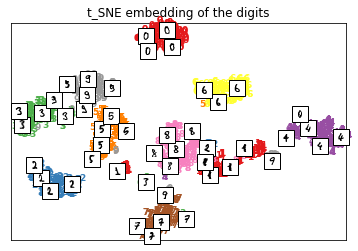

In [4]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i,1], str(y[i]),
        color=plt.cm.Set1(y[i] / 10.),
        fontdict={'weight': 'bold', 'size': 9})
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i],                             cmap=plt.cm.gray_r),X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

print("Computing t-SNE embedding")
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
"t_SNE embedding of the digits")

plt.show()